In [17]:
import pandas as pd
import os

# Correcting the file path
file_path = r'C:\Graduate Admission Prediction using ANN\Admission_Predict_Ver1.1.csv'

# Read the CSV file
data = pd.read_csv(file_path)




In [ ]:
# Displays the first few rows of the dataset to understand its structure.
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.shape   #Provides the dimensions of the DataFrame (number of rows and columns).

(500, 9)

In [ ]:
data.info()   #for checking any missing values in columns and it is also Gives a concise summary of the DataFrame including the non-null count and data type of each column, useful for identifying missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
data.duplicated().sum()  #for checking any duplicated row is present in databse

0

In [ ]:
data.drop(columns=['Serial No.'],inplace=True)     #Removes the 'Serial No.' column as it's likely just an identifier.

In [24]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
#This line selects all rows (:) and all columns except the last one (0:-1) from the DataFrame data.
#This means X will contain all the feature columns that are used to input into the model.
#The slicing 0:-1 uses Python's list slicing syntax where -1 represents the last item, so 0:-1 includes everything up to but not including the last column.

X= data.iloc[:,0:-1]



#This line selects all rows (:) and only the last column (-1) of the DataFrame.
#This column in y will be the target variable or the output that your model aims to predict.
#The -1 specifically selects the last column, which is typically reserved for the label or dependent variable in many data science workflows where the dataset is structured with features first and the label last.
y= data.iloc[:,-1]

In [26]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [27]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [ ]:
#Splits the data into training and test sets, with 20% of the data reserved for testing.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [29]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler    #Scales the feature data to a range [0, 1], which is often beneficial for neural network convergence.
scaler  = MinMaxScaler()


#fit_transform() on X_train and transform() on X_test: Applies scaling. It’s important to fit the scaler only on training data to avoid leakage of information from the test set.
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [ ]:
import tensorflow
from tensorflow import keras
from keras import Sequential    #Sequential: This is imported from Keras and is used to create a model that is a linear stack of layers.
from keras.layers import Dense   #Dense: This is also imported from Keras and is used to create densely-connected (fully connected) neural network layers.

In [ ]:
#Defining the model:
model = Sequential()

#Adding layers to the model:
model.add(Dense(7, activation='relu', input_shape=(7,)))  #The first layer in the model. It is a densely-connected layer with 7 neurons. The activation='relu' specifies that the rectified linear unit function should be used as the activation function. input_shape=(7,) defines the shape of the input data (7 features), indicating that this is the first layer.
model.add(Dense(7, activation='relu'))   #A second densely-connected layer with 7 neurons, also using the ReLU activation function. Since it's not the first layer in the network, there is no need to specify input_shape as Keras automatically infers the shape from the previous layer.
model.add(Dense(1,activation='linear'))  #The output layer of the model with a single neuron. This uses a linear activation function. In the context of regression, a linear activation function allows the model to predict continuous values directly.

c:\Users\KIIT0001\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Compile Model
model.compile(loss='mean_squared_error',optimizer='Adam')  #Configures the model with the Adam optimizer and mean squared error loss function, which is standard for regression problems.

In [ ]:
#Train Model
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)  #Trains the model for 100 epochs, using 20% of the training data as validation data to monitor performance on unseen data during training.

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0326 - val_loss: 0.8882
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7200 - val_loss: 0.6811
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5911 - val_loss: 0.5194
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4503 - val_loss: 0.3976
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3439 - val_loss: 0.3012
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2442 - val_loss: 0.2214
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1809 - val_loss: 0.1543
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1299 - val_loss: 0.1016
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0846 - val_loss: 0.0638
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0519 - val_loss: 0.0396
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0308 - val_loss: 0.0260
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.

In [ ]:
#Model Evaluation

y_pred = model.predict(X_test_scaled)   #Predicts the output for the test set.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


In [ ]:
#Calculates the R² score, which provides an indication of goodness of fit and the percentage of variance explained by the model.
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.7976522958925928

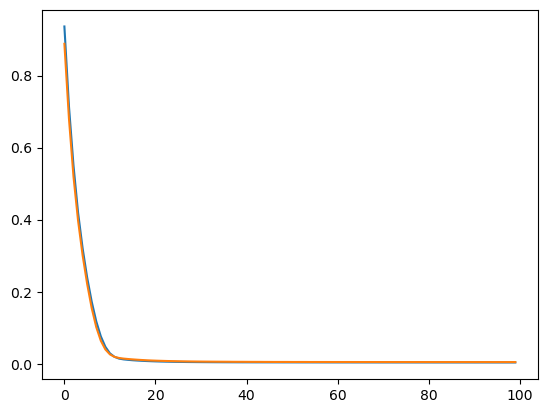

In [ ]:
#Visualize Training Progress
#Plots: Shows how the loss and validation loss decrease over epochs, which can indicate whether the model is learning effectively and if it's overfitting or underfitting.
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])